In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# House Data

In [2]:
house_df = pd.read_csv('../Data/1976-2022-house.csv')
print(house_df.shape)
house_df = house_df[['year', 'state', 'state_po', 'party', 'candidatevotes', 'totalvotes', 'unofficial', 'district']]
house_df.head()

(32452, 20)


,year,state,state_po,party,candidatevotes,totalvotes,unofficial,district
0,1976,ALABAMA,AL,DEMOCRAT,58906,157170,False,1
1,1976,ALABAMA,AL,REPUBLICAN,98257,157170,False,1
2,1976,ALABAMA,AL,NaN,7,157170,False,1
3,1976,ALABAMA,AL,DEMOCRAT,66288,156362,False,2
4,1976,ALABAMA,AL,REPUBLICAN,90069,156362,False,2


In [3]:
# Won't count votes if the party is NaN, so replace with OTHER
house_df['party'].fillna('OTHER', inplace=True)
house_df.head()

,year,state,state_po,party,candidatevotes,totalvotes,unofficial,district
0,1976,ALABAMA,AL,DEMOCRAT,58906,157170,False,1
1,1976,ALABAMA,AL,REPUBLICAN,98257,157170,False,1
2,1976,ALABAMA,AL,OTHER,7,157170,False,1
3,1976,ALABAMA,AL,DEMOCRAT,66288,156362,False,2
4,1976,ALABAMA,AL,REPUBLICAN,90069,156362,False,2


In [4]:
# Only want elections that are official and on 2020 or 2022
house_df_2020_on = house_df.query('year >= 2020 and unofficial == False')
print(house_df_2020_on.shape)
house_df_2020_on.head()

(2816, 8)


,year,state,state_po,party,candidatevotes,totalvotes,unofficial,district
29636,2020,ALABAMA,AL,DEMOCRAT,116949,329075,False,1
29637,2020,ALABAMA,AL,REPUBLICAN,211825,329075,False,1
29638,2020,ALABAMA,AL,OTHER,301,329075,False,1
29639,2020,ALABAMA,AL,REPUBLICAN,197996,303569,False,2
29640,2020,ALABAMA,AL,DEMOCRAT,105286,303569,False,2


In [5]:
# We don't care about the districts so sum the votes for a party across all districts
votes_by_year_state_party = house_df_2020_on.groupby(['year', 'state_po', 'party'])['candidatevotes'].sum()
votes_by_year_state_party

year  state_po  party       
2020  AK        DEMOCRAT        159856
                OTHER             1183
                REPUBLICAN      192126
      AL        DEMOCRAT        608809
                OTHER            26838
                                 ...  
2022  WY        CONSTITUTION      4505
                DEMOCRAT         47250
                LIBERTARIAN       5420
                OTHER             8817
                REPUBLICAN      132206
Name: candidatevotes, Length: 469, dtype: int64

In [6]:
years = [2020, 2022]
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 
        'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
        'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 
        'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
print(len(states))
main_parties = ['DEMOCRAT', 'REPUBLICAN']

50


In [7]:
# make a dictionary where the first key:value is year:rest
# next is state:rest
# final is one of three parties (Democrat, Republican, Other) and their vote counts
# votes => first is year:states => states:parties => parties:votes
# votes[year][state][party] = votes
votes = {}
for year in years:
    votes[year] = {}
    for state in states:
        votes[year][state] = {}
        parties = list(votes_by_year_state_party[year][state].keys())
        for party in parties:
            if party in main_parties:
                votes[year][state][party] = votes_by_year_state_party[year][state][party]
            else:
                try:
                    votes[year][state]['OTHER'] += votes_by_year_state_party[year][state][party]
                except:
                    votes[year][state]['OTHER'] = votes_by_year_state_party[year][state][party] 

print(votes[2020])

{'AL': {'DEMOCRAT': 608809, 'OTHER': 26838, 'REPUBLICAN': 1416012}, 'AK': {'DEMOCRAT': 159856, 'OTHER': 1183, 'REPUBLICAN': 192126}, 'AZ': {'DEMOCRAT': 1629318, 'REPUBLICAN': 1638516, 'OTHER': 415}, 'AR': {'DEMOCRAT': 330485, 'OTHER': 20645, 'REPUBLICAN': 828266}, 'CA': {'DEMOCRAT': 11084234, 'REPUBLICAN': 5640667}, 'CO': {'OTHER': 107650, 'DEMOCRAT': 1679052, 'REPUBLICAN': 1378248}, 'CT': {'DEMOCRAT': 1022792, 'OTHER': 73485, 'REPUBLICAN': 676650}, 'DE': {'DEMOCRAT': 281382, 'OTHER': 10496, 'REPUBLICAN': 196392}, 'FL': {'DEMOCRAT': 4942287, 'OTHER': 53340, 'REPUBLICAN': 5469163}, 'GA': {'DEMOCRAT': 2393089, 'REPUBLICAN': 2490396, 'OTHER': 126}, 'HI': {'OTHER': 69807, 'DEMOCRAT': 354762, 'REPUBLICAN': 155215}, 'ID': {'OTHER': 32973, 'DEMOCRAT': 255531, 'REPUBLICAN': 561405}, 'IL': {'DEMOCRAT': 3355487, 'OTHER': 104403, 'REPUBLICAN': 2416929}, 'IN': {'DEMOCRAT': 1194901, 'OTHER': 62798, 'REPUBLICAN': 1738745}, 'IA': {'DEMOCRAT': 762271, 'OTHER': 78579, 'REPUBLICAN': 859418}, 'KS': {'DEM

In [8]:
print(votes[2020]['AL'])
# print(len(house_df_2020_on.query('year == 2020 and state_po == "AL"')))
# house_df_2020_on.query('year == 2020 and state_po == "AL"')

{'DEMOCRAT': 608809, 'OTHER': 26838, 'REPUBLICAN': 1416012}


# 2020 Census

In [9]:
census_df = pd.read_csv('../Data/2020-Census.csv')
census_df["POPULATION"] = census_df["POPULATION"].str.replace(',', '').astype(int)
census_df.head()

,AREA,CODE,POPULATION
0,Alabama,AL,5024279
1,Alaska,AK,733391
2,Arizona,AZ,7151502
3,Arkansas,AR,3011524
4,California,CA,39538223


In [10]:
# Turn the census_df into a series, indexed by state
census_df.set_index(census_df['CODE'], inplace=True)
census_arr = census_df['POPULATION']
print(census_arr['AL'])
print(len(census_arr))
print(census_arr.index)

5024279
54
Index(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA',
       'WV', 'WI', 'WY', 'TO', 'PR', 'TT'],
      dtype='object', name='CODE')


# COVID-19 Data

In [34]:
covid_df = pd.read_csv('../Data/COVID-19_Reported.csv')
print(covid_df.shape)

# New column where it is the combined adult and pediatric COVID confirmed cases
# Filling NaN values with 0s to make it possible 
covid_df['total_previous_day_cases'] = covid_df['previous_day_admission_adult_covid_confirmed'].fillna(0) + covid_df['previous_day_admission_pediatric_covid_confirmed'].fillna(0)
covid_df = covid_df[['date', 'state', 'total_previous_day_cases']]
covid_df.head()
# covid_df = covid_df[['state', 'date']]

(79823, 135)


,date,state,total_previous_day_cases
0,6/2/2021,PR,3.0
1,6/1/2021,ME,11.0
2,5/30/2021,MT,13.0
3,5/29/2021,AK,0.0
4,5/29/2021,MA,33.0


In [35]:
# Create month and year columns to properly add up and categorize the data
covid_df['month'] = covid_df['date'].str.split('/').str[0]
covid_df['year'] = covid_df['date'].str.split('/').str[2].astype(int)

In [36]:
# Deaths by covid-19
# deaths_by_year_month_state = covid_df.groupby(['year', 'month', 'state'])['deaths_covid'].sum()
# print(deaths_by_year_month_state['2020']['3'].keys())

In [37]:
# # Checking if all of the states are in each month
# states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 
#         'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
#         'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 
#         'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
# len_states = []
# for i in range(1, 13):
#     potential = list(cases_by_year_state['2020'][str(i)].keys())
#     flag = True
#     for s in states:
#         if s not in potential:
#             flag = False
#             print(s)
#             break
#     len_states.append(flag)

# # For the first two months of 2020, all of the states are not reporting data yet, 
# # so these months will be cut out, the rest are fine
# len_states

In [38]:
cases_by_year_state = covid_df.groupby(['year', 'state'])['total_previous_day_cases'].sum()
cases_by_year_state[2020].keys()

Index(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
       'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
       'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI',
       'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object', name='state')

# Notes after initial EDA
1. COVID
    - 50 States
    - VI (Virgin Islands)
    - DC
    - PR (Puerto Rico)
2. Census
    - 50 States
    - TO (Total Resident Pop)
    - TT (Total Pop (with PR))
    - DC
    - PR (Puerto Rico)
3. House Votes
    - 50 States

### Need to do:
- Normalize data (house votes and COVID cases) with census data
- The different "DataFrames"
    - cases_by_year_state (dataframe; COVID cases grouped by year, then state)
    - census_arr (series; indexed by state)
    - votes (dictionary; indexed year, then state, then party)

In [39]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 
        'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 
        'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 
        'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']
house_years = [2020, 2022]
parties = ["DEMOCRAT", "REPUBLICAN", "OTHER"]
covid_years = [2020, 2021, 2022, 2023]

In [40]:
# House Normalize
other_counter = 0
votes_norm = {}
for y in house_years:
    votes_norm[y] = {}
    for s in states:
        votes_norm[y][s] = {}
        for p in parties:
            if p in votes[y][s].keys():
                votes_norm[y][s][p] = votes[y][s][p] / census_arr[s]
            else:
                votes_norm[y][s][p] = 0
                other_counter += 1

        
print(sum(votes_norm[2020]['AK'].values()))
votes_norm[2020]['AK']


0.48155076896225885


{'DEMOCRAT': 0.21796831430982927,
 'REPUBLICAN': 0.2619693996790252,
 'OTHER': 0.001613054973404364}

In [41]:
# COVID Normalize
cases_norm = {}
for y in covid_years:
    cases_norm[y] = {}
    for s in states:
        cases_norm[y][s] = cases_by_year_state[y][s] / census_arr[s]

# Now a dictionary indexed year, state
cases_norm[2020]['AK']

0.002056201944119849

# Plotting
Normalized Data:  
    - votes_norm (indexed year, state)  
    - cases_nomr (indexed year, state)

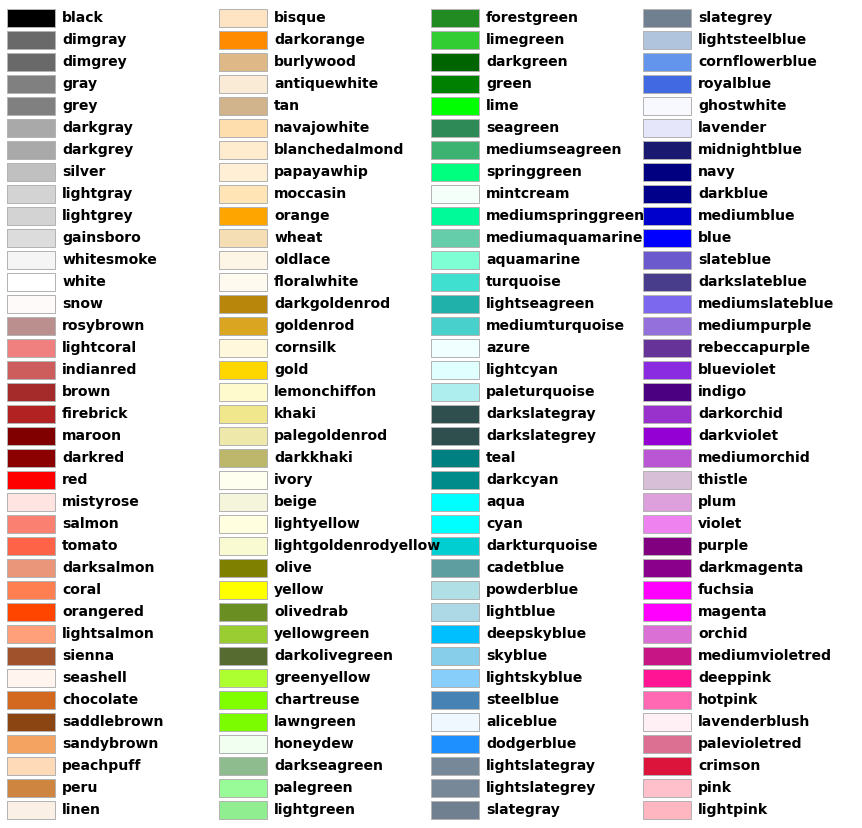

In [53]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [55]:
print(mcolors.CSS4_COLORS.keys())


dict_keys(['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lights

In [67]:
# Making some nice colors for the different states
import matplotlib.colors as color
random_c_map = np.random.choice(list(color.CSS4_COLORS.keys()), replace=False, size=50)
state_to_color = zip(states, random_c_map)
print(list(state_to_color))


[('AL', 'tomato'), ('AK', 'olivedrab'), ('AZ', 'tan'), ('AR', 'midnightblue'), ('CA', 'slateblue'), ('CO', 'lightsalmon'), ('CT', 'orchid'), ('DE', 'cornsilk'), ('FL', 'darkseagreen'), ('GA', 'darkgreen'), ('HI', 'lightpink'), ('ID', 'gainsboro'), ('IL', 'teal'), ('IN', 'turquoise'), ('IA', 'rebeccapurple'), ('KS', 'snow'), ('KY', 'lightcoral'), ('LA', 'deeppink'), ('ME', 'gold'), ('MD', 'lemonchiffon'), ('MA', 'mediumspringgreen'), ('MI', 'linen'), ('MN', 'navy'), ('MS', 'aliceblue'), ('MO', 'mediumseagreen'), ('MT', 'darkblue'), ('NE', 'ghostwhite'), ('NV', 'dimgrey'), ('NH', 'rosybrown'), ('NJ', 'darkviolet'), ('NM', 'mintcream'), ('NY', 'papayawhip'), ('NC', 'lavender'), ('ND', 'firebrick'), ('OH', 'chartreuse'), ('OK', 'azure'), ('OR', 'royalblue'), ('PA', 'darkmagenta'), ('RI', 'limegreen'), ('SC', 'aqua'), ('SD', 'lime'), ('TN', 'darkgoldenrod'), ('TX', 'khaki'), ('UT', 'mediumaquamarine'), ('VT', 'seashell'), ('VA', 'lawngreen'), ('WA', 'orange'), ('WV', 'powderblue'), ('WI', '

Text(0, 0.5, 'COVID Cases')

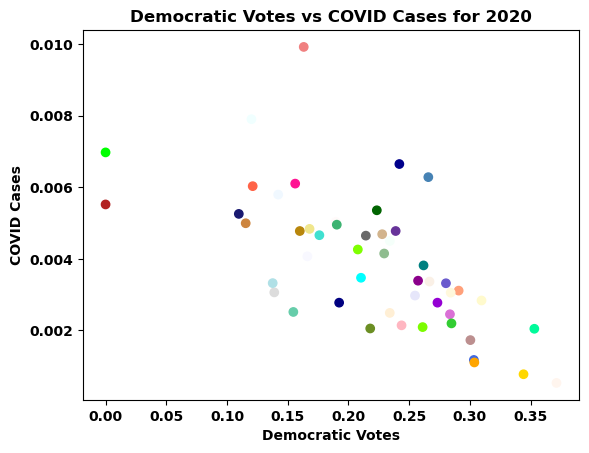

In [68]:
# Plotting Democratic Votes for 2020
x = []
y = []
for s in states:
    x.append(votes_norm[2020][s]['DEMOCRAT'])
    y.append(cases_norm[2020][s])
plt.scatter(x, y, c=random_c_map)
plt.title("Democratic Votes vs COVID Cases for 2020")
plt.xlabel("Democratic Votes")
plt.ylabel("COVID Cases")

Text(0, 0.5, 'COVID Cases')

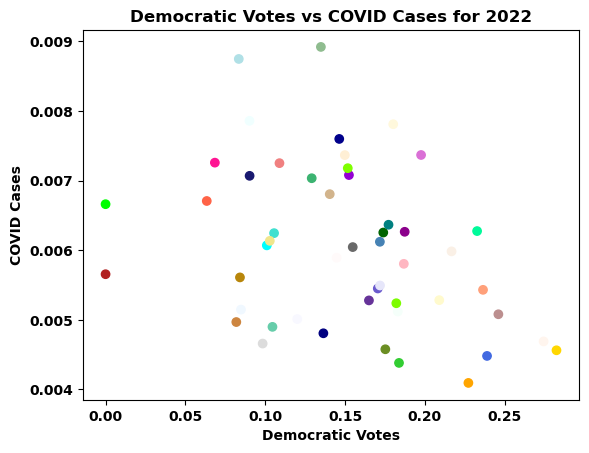

In [69]:
# Plotting Democratic Votes for 2022
x = []
y = []
for s in states:
    x.append(votes_norm[2022][s]['DEMOCRAT'])
    y.append(cases_norm[2022][s])
plt.scatter(x, y, c=random_c_map)
plt.title("Democratic Votes vs COVID Cases for 2022")
plt.xlabel("Democratic Votes")
plt.ylabel("COVID Cases")

Text(0, 0.5, 'COVID Cases')

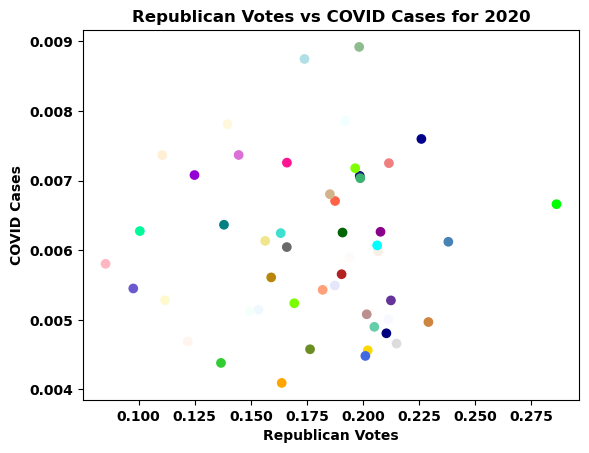

In [70]:
# Plotting Republican Votes for 2020
x = []
y = []
for s in states:
    x.append(votes_norm[2022][s]['REPUBLICAN'])
    y.append(cases_norm[2022][s])
plt.scatter(x, y, c=random_c_map)
plt.title("Republican Votes vs COVID Cases for 2020")
plt.xlabel("Republican Votes")
plt.ylabel("COVID Cases")

Text(0, 0.5, 'COVID Cases')

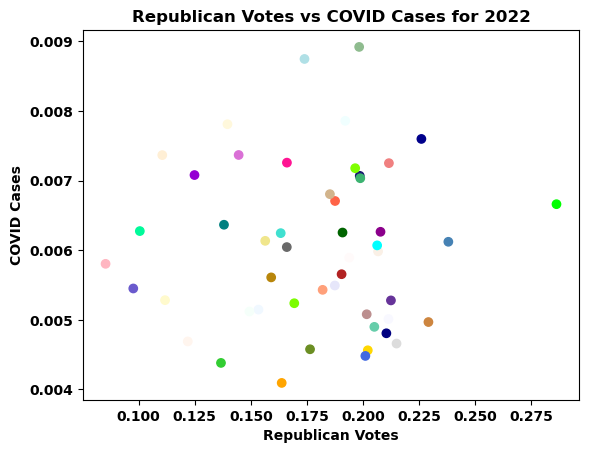

In [71]:
# Plotting Republican Votes for 2022
x = []
y = []
for s in states:
    x.append(votes_norm[2022][s]['REPUBLICAN'])
    y.append(cases_norm[2022][s])
plt.scatter(x, y, c=random_c_map)
plt.title("Republican Votes vs COVID Cases for 2022")
plt.xlabel("Republican Votes")
plt.ylabel("COVID Cases")

Text(0, 0.5, 'COVID Cases')

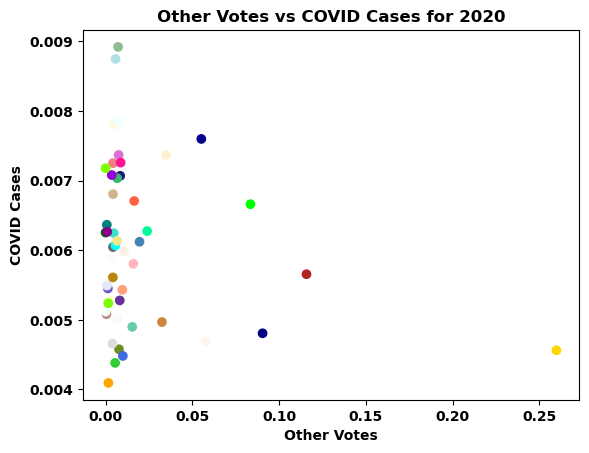

In [72]:
# Plotting Republican Votes for 2020
x = []
y = []
for s in states:
    x.append(votes_norm[2022][s]['OTHER'])
    y.append(cases_norm[2022][s])
plt.scatter(x, y, c=random_c_map)
plt.title("Other Votes vs COVID Cases for 2020")
plt.xlabel("Other Votes")
plt.ylabel("COVID Cases")